In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [273]:
dataset = pd.read_csv('AB_NYC_2019.csv')

In [274]:
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [275]:
dataset.columns#.value_counts().sum()

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [276]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [277]:
dataset.shape

(48895, 16)

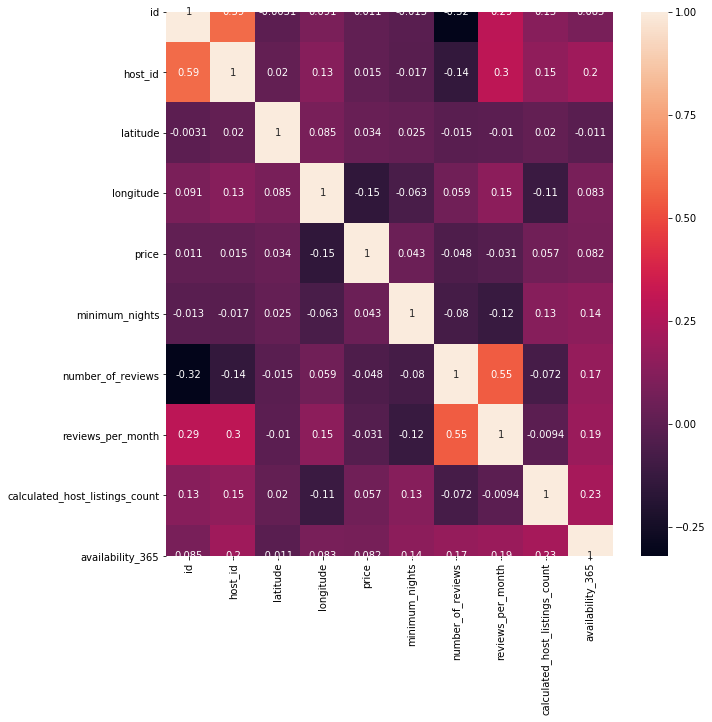

In [278]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset[dataset.corr().index].corr(),annot = True)

In [279]:
dataset.drop(columns = ['id', 'host_id','name','host_name'],inplace = True) #since are of no use in predicting price 

In [280]:
dataset.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [281]:
dataset.drop(columns = ['number_of_reviews','last_review','reviews_per_month'],inplace = True) #These features are also useless

In [282]:
dataset.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,1,0


In [283]:
dataset['neighbourhood_group'].value_counts()#.count()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [284]:
dataset['neighbourhood'].nunique() #find number of unique elements in this feature,hence it has very high cardinality

221

In [285]:
dataset.describe()

,latitude,longitude,price,minimum_nights,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,327.000000,365.000000


In [286]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 9 columns):
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 3.4+ MB


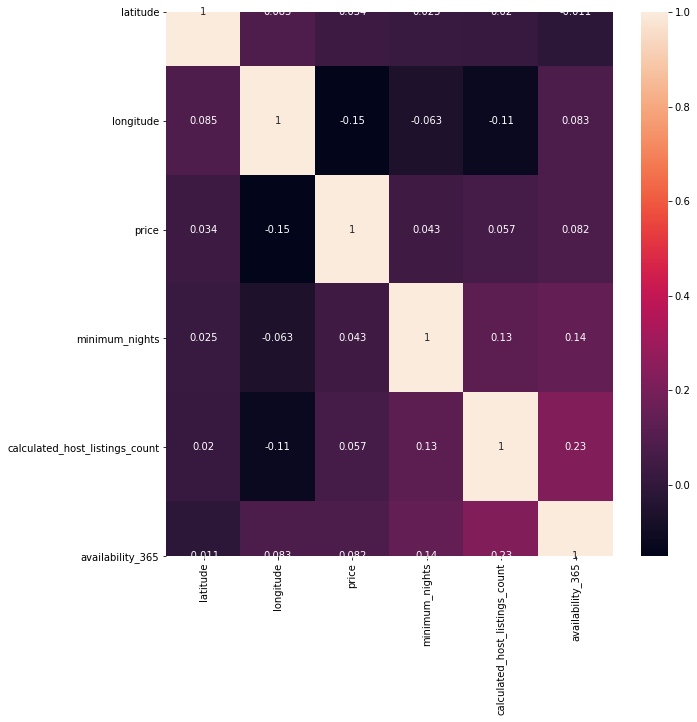

In [287]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset[dataset.corr().index].corr(),annot = True)

In [288]:
dataset.isnull().values.any()

False

In [305]:
#seperating dependent and independent features
X=dataset.drop(['price'],axis = 1)
y=dataset['price']

In [306]:
X.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,3,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,1,0


In [307]:
X.shape

(48895, 8)

In [308]:
y.head()

0    149
1    225
2    150
3     89
4     80
Name: price, dtype: int64

In [309]:
#'neighbourhood' feature has very high cardinality, so I have applied 'Count Frequency Encoding' method to tacle this categorical feature
X.neighbourhood.value_counts().to_dict()

{'Williamsburg': 3920,
 'Bedford-Stuyvesant': 3714,
 'Harlem': 2658,
 'Bushwick': 2465,
 'Upper West Side': 1971,
 "Hell's Kitchen": 1958,
 'East Village': 1853,
 'Upper East Side': 1798,
 'Crown Heights': 1564,
 'Midtown': 1545,
 'East Harlem': 1117,
 'Greenpoint': 1115,
 'Chelsea': 1113,
 'Lower East Side': 911,
 'Astoria': 900,
 'Washington Heights': 899,
 'West Village': 768,
 'Financial District': 744,
 'Flatbush': 621,
 'Clinton Hill': 572,
 'Long Island City': 537,
 'Prospect-Lefferts Gardens': 535,
 'Park Slope': 506,
 'East Flatbush': 500,
 'Fort Greene': 489,
 'Murray Hill': 485,
 'Kips Bay': 470,
 'Flushing': 426,
 'Ridgewood': 423,
 'Greenwich Village': 392,
 'Sunset Park': 390,
 'Chinatown': 368,
 'Sunnyside': 363,
 'SoHo': 358,
 'Prospect Heights': 357,
 'Morningside Heights': 346,
 'Gramercy': 338,
 'Ditmars Steinway': 309,
 'Theater District': 288,
 'South Slope': 284,
 'Nolita': 253,
 'Inwood': 252,
 'Gowanus': 247,
 'Elmhurst': 237,
 'Woodside': 235,
 'Carroll Gardens

In [310]:
frequency_map = X.neighbourhood.value_counts().to_dict()

In [311]:
X.neighbourhood = X.neighbourhood.map(frequency_map)

In [312]:
X.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,175,40.64749,-73.97237,Private room,1,6,365
1,Manhattan,1545,40.75362,-73.98377,Entire home/apt,1,2,355
2,Manhattan,2658,40.80902,-73.94190,Private room,3,1,365
3,Brooklyn,572,40.68514,-73.95976,Entire home/apt,1,1,194
4,Manhattan,1117,40.79851,-73.94399,Entire home/apt,10,1,0


In [313]:
X = pd.get_dummies(X)

In [314]:
X.shape

(48895, 14)

In [315]:
X.head()

,neighbourhood,latitude,longitude,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,175,40.64749,-73.97237,1,6,365,0,1,0,0,0,0,1,0
1,1545,40.75362,-73.98377,1,2,355,0,0,1,0,0,1,0,0
2,2658,40.80902,-73.94190,3,1,365,0,0,1,0,0,0,1,0
3,572,40.68514,-73.95976,1,1,194,0,1,0,0,0,1,0,0
4,1117,40.79851,-73.94399,10,1,0,0,0,1,0,0,1,0,0


In [316]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[['latitude','longitude','minimum_nights','calculated_host_listings_count','availability_365']] = sc.fit_transform(X[['latitude','longitude','minimum_nights','calculated_host_listings_count','availability_365']])
X.head()

,neighbourhood,latitude,longitude,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,175,-1.493849,-0.437652,-0.293996,-0.034716,1.916250,0,1,0,0,0,0,1,0
1,1545,0.452436,-0.684639,-0.293996,-0.156104,1.840275,0,0,1,0,0,1,0,0
2,2658,1.468399,0.222497,-0.196484,-0.186451,1.916250,0,0,1,0,0,0,1,0
3,572,-0.803398,-0.164450,-0.293996,-0.186451,0.617065,0,1,0,0,0,1,0,0
4,1117,1.275660,0.177216,0.144807,-0.186451,-0.856865,0,0,1,0,0,1,0,0


In [317]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [318]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=30,random_state = 0)
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [319]:
y_pred = regressor.predict(X_test)

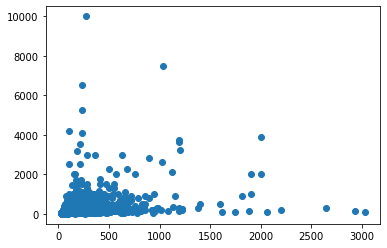

In [320]:
plt.scatter(y_pred,y_test)
plt.show()